In [33]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as npr

In [34]:
def simulate_ode(f, x0, Nsteps=1000, delta=1e-2):
    t_out = np.zeros(Nsteps+1)
    x_out = np.zeros((Nsteps+1, len(x0)))
    x = x0
    t = 0.0
    t_out[0] = t
    x_out[0,:] = x
    for step in range(Nsteps):
        t = t + delta
        x = x + delta * f(x)
        t_out[step+1] = t
        x_out[step+1,:] = x
    return (t_out, x_out)

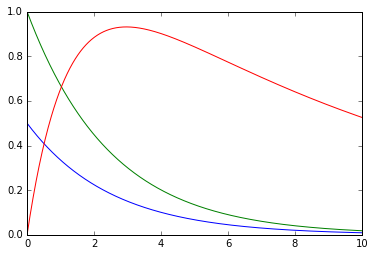

In [36]:
f1 = lambda x: np.array([-0.4*x[0], -0.4*x[1], 2*x[0]*x[1]-0.1*x[2]])

t, x = simulate_ode(f1, np.array([0.5, 1.0, 0.0]))
plt.plot(t, x)

In [37]:
def simulate_sde(f, g, x0, Nsteps=1000, delta=1e-2):
    t_out = np.zeros(Nsteps+1)
    x_out = np.zeros((Nsteps+1, len(x0)))
    x = x0
    t = 0.0
    t_out[0] = t
    x_out[0,:] = x
    for step in range(Nsteps):
        t = t + delta
        x = x + delta * f(x) + g(x) * np.sqrt(delta) * npr.randn(*x.shape)
        t_out[step+1] = t
        x_out[step+1,:] = x
    return (t_out, x_out)

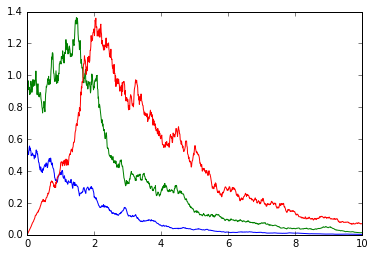

In [41]:
f1 = lambda x: np.array([-0.4*x[0], -0.4*x[1], x[0]*x[1]-0.1*x[2]])
g1 = lambda x: np.array([0.3*x[0], 0.3*x[1], 0.3*x[2]])

t, x = simulate_sde(f1, g1, np.array([0.5, 1.0, 0.0]))
plt.plot(t, x)